In [2]:
#pytania: czy mamy zaczynać od któregoś konkretnego wierzchołka 

In [41]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import random

# Load instance

In [42]:
instance_number = 1  # 0 - "kroA100.tsp"    1 - "kroB100.tsp"
instances_names = ["kroA100.tsp","kroB100.tsp"]
data = np.genfromtxt(f'instances/{instances_names[instance_number]}', skip_header=6, skip_footer=1, dtype='int64')[:,1:]

# Calculating distance matrix

In [43]:
def calc_distance_matrix(data):
    dist_matrix = distance_matrix(data, data)
    dist_matrix = np.around(dist_matrix, decimals=0)
    dist_matrix = dist_matrix.astype(int)
    return dist_matrix

In [44]:
distance_matrix = calc_distance_matrix(data)
distance_matrix

array([[   0, 2607,  549, ...,  229,  618, 1249],
       [2607,    0, 3154, ..., 2621, 3075, 2661],
       [ 549, 3154,    0, ...,  571,  403, 1499],
       ...,
       [ 229, 2621,  571, ...,    0,  480, 1475],
       [ 618, 3075,  403, ...,  480,    0, 1796],
       [1249, 2661, 1499, ..., 1475, 1796,    0]])

# GREEDY

In [45]:
def greedy_algorithm(N, start_point):
    
    n = int(np.ceil(N / 2))
    visited = np.array([start_point])
    total_distance = 0
    point = start_point
    
    for i in range(n-1):
        sorted_distances = np.argsort(distance_matrix[point])[1:]
        new_point = sorted_distances[~np.in1d(sorted_distances, visited)][0]

        visited = np.append(visited, [new_point])
        distance = distance_matrix[point, new_point]
        total_distance += distance
        point = new_point
        
        
    visited = np.append(visited, [start_point])
    total_distance += distance_matrix[point, start_point]
    
    return (total_distance, visited)

In [46]:
N = 100

MIN = 100000
MAX = 0
TAB_MAX = np.array([])
TAB_MIN = np.array([])
LAST = np.array([])
last = 0
SUM = 0

for i in range(0, 100):
    start_point = random.randint(0, 99) 
    
    total_distance, visited = greedy_algorithm(N, start_point)
    LAST = visited
    last = total_distance
    if total_distance > MAX:
        MAX = total_distance
        TAB_MAX = visited
    if total_distance < MIN:
        MIN = total_distance
        TAB_MIN = visited
    SUM += total_distance

In [47]:
print(MIN)
print(MAX)
print(TAB_MAX)
print(TAB_MIN)
print(SUM/100)

10547
15747
[13 63 81 41  1 12 77 16 44 35 95 91 18 43 40 17 23 76 15 49 42 88 86 59
 73 65  3 82  5 14 32 47 30 62 50 54 21 22 87 53 51 57 83  6 56 93 60 34
 26 70 13]
[64 78 80 46 36 71 19 79 37 85 48 29 74 68 25 99 55 61  4 66 39 38 69 52
 72 84 92 10  2 27 90 96 98  7 28 31 58 75 97 11 70 26 60 34 93 56 33  6
 83 57 64]
13468.35


# Regret Heuristic

In [50]:
def regret_heuristic(N, start_point):  
    n = int(np.ceil(N / 2))
    point = start_point
    visited = np.array([point])
    total_distance = 0
    T = np.arange(100)
    allowed = np.array(T)
    
    
    
    for i in range(1, n):
        points_to_check = allowed[~np.in1d(allowed, visited)]
        
        
        # wstawia każdy dostępny wierzchołek w każde miejsce istniejącej ścieżki
        best_next_point = find_path_extension(visited, points_to_check)
        # szuak minimum w tablicy position - pozycja na ścieżce idx to index punktu
        position, point_idx = np.unravel_index(best_next_point.argmin(), best_next_point.shape)
        

        greedy_path=visited.copy()
        greedy_position=position
        greedy_point=points_to_check[point_idx]
        greedy_path = np.insert(greedy_path, greedy_position, greedy_point)
        
        
        path_extensions = find_path_extension(greedy_path, points_to_check)
        path_extensions[:,point_idx]=0
        a = path_extensions.min(axis=0)
        b = best_next_point.min(axis=0)
        regret= a -b

        point_idx =regret.argmax()
        position=np.argmin(best_next_point[:,point_idx])
        visited = np.insert(visited, position, points_to_check[point_idx])
        

    return visited



def find_path_extension(path, points):
    ext = [[evaluate(path.copy(), point, position) for point in points] for position in range(len(path))]
    return np.array(ext)


def evaluate(path, point, position):
    path = np.insert(path, position, point)
    return path_length(path)


def path_length(path):
	length = 0
	for i in range(len(path)-1):
		length += distance_matrix[path[i], path[i+1]]

	length += distance_matrix[path[-1], path[0]]
	return length

In [51]:
N = 100
start_point = random.randint(0, 99) 
path = regret_heuristic(N, start_point)
wynik = path_length(path)

In [52]:
wynik

17754

In [59]:
MIN = 100000
MAX = 0
TAB_MAX = np.array([])
TAB_MIN = np.array([])
SUM = 0

for i in range(0, 50):
    print(i)
    start_point = random.randint(0, 99) 
#     _, result = greedy_algorithm(N, start_point)
    T = np.arange(100)
    new_path = regret_heuristic(N, start_point)
    new_path = np.append([start_point], new_path)
    total_distance = path_length(new_path)
    if total_distance > MAX:
        MAX = total_distance
        TAB_MAX = new_path
    if total_distance < MIN:
        MIN = total_distance
        TAB_MIN = new_path
    SUM += total_distance

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [61]:
print(MIN)
print(MAX)
print(TAB_MAX)
print(TAB_MIN)
print(SUM/50)

16985
20228
[27  7 75 28 31  0 11 45 24  8 51  6 26 34 65  3  5 14 42 13 15  1 12 81
 50 30 16 40 43 18 35 17 23 76 21 22 80 64 19 48 99 25 68  4  9 20  2 84
 92 10 27]
[15  1 35 18 16 12 30 13 32 14  5  3 65 34 26  6 33 24  8 11  0 31 28  7
 27  2 10 84 72 69 38 66  4 39  9 20 37 19 79 29 25 55 80 46 36 22 21 54
 23 17 15]
18408.88


In [32]:
print(MIN)
print(MAX)
print(TAB_MAX)
TAB_MIN = np.append(TAB_MIN, 34)
print(TAB_MIN)
print(SUM/30)

15528
20423
[ 7  0  5 46 27 86 24 84 72  1 94 12 32  4 38 51 13 40  2 42 82  8  6 19
 11 26 34 76 22 90 44 10 14 16 20  9 98 23 17 93 78 52 15 21 69 25  3 18
 30 53 53]
[34 26 11  6  8 33 28  2 42 70 13 29 77  4 32 12 94  1 80 24 66 27  0  5
 48 18 74  7 41 30 96  3 25 69 21 15 93 17 23  9 20 10 16 14 31 90 97 22
 59 19 19 76 34 34]
18245.4


In [36]:
new_path = [34, 26, 11,  6,  8, 33, 28,  2, 42, 70, 13, 29, 77,  4, 32, 12, 94,  1, 80, 24, 66, 27,  0,  5,
 48, 18, 74,  7, 41, 30, 96,  3, 25, 69, 21, 15, 93, 17, 23,  9, 20, 10, 16, 14, 31, 90, 97, 22,
 59, 19, 34]

# Wykres

In [57]:
def print_plot(data, points):
    f = plt.figure()
    plt.plot(data[:, 0], data[:, 1], "o", linewidth=0, alpha=0.4)
    plt.plot(data[points, 0], data[points, 1], "o", color='tab:blue',  linewidth=0, alpha=0.6)
    plt.plot(data[points, 0], data[points, 1], "--", color="tab:cyan", linewidth=1, alpha=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Regret heuristic - kroB100")
    plt.grid(False)
    
    plt.show()
    f.savefig('regretB.pdf', bbox_inches='tight')

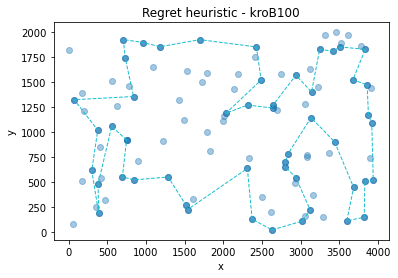

In [62]:
print_plot(data, TAB_MIN)

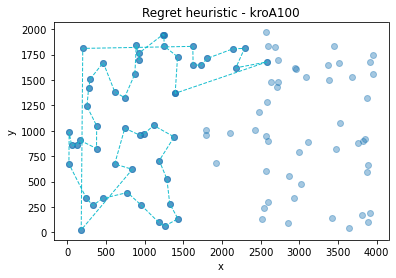

In [97]:

print_plot(data, TAB_MAX)

[69 21 15 87 93 17 23 37 35 98 83  9 71 20 73 58 16 14 10 31 90 97 22 44
 46 62  5 48 89 78 52 18 74 96 55 79 30 88 41  7 91  0 92 27 66 57 60 24
 80 68 69]


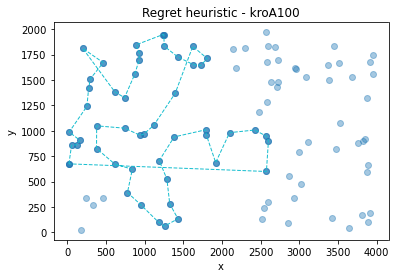

In [30]:
print(visited)
print_plot(data, visited)